<a href="https://colab.research.google.com/github/hhant-max/22SpringCourses/blob/main/IR/IR11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip /content/drive/MyDrive/viva_search_correct.100K.txt.zip

Archive:  /content/drive/MyDrive/viva_search_correct.100K.txt.zip
  inflating: viva_search_correct.100K.txt  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocess

In [ ]:
data = pd.read_csv('/content/viva_search_correct.100K.txt',sep='\t',header=None)

In [ ]:
# https://forum.viva.nl/index.php

# add column
data.columns = ['timestamp','1','2','3','4','SQI','datingsite','website','query','click_web']
data.head(10)

,timestamp,1,2,3,4,SQI,datingsite,website,query,click_web
0,2015-12-07 01:59:37.681+0000,c,ez0akax062,\N,3,\N,datingsite,\N,"Nog steeds actief op datingsite, na aantal dates",http://forum.viva.nl/forum/list_messages/213020
1,2015-12-07 01:59:30.982+0000,q,ez0akax062,true,2,Search query input,datingsite,Viva Forum,\N,\N
2,2015-12-07 01:59:19.660+0000,q,ez0akax062,true,0,Search query input,datingsite,"Viva Forum,www.viva.nl,Viva Forum",\N,\N
3,2015-12-07 01:57:10.915+0000,c,ez0akax062,\N,2,\N,datingsite,\N,hij is nog steeds actief op datingsite,http://forum.viva.nl/forum/relaties/hij-is-nog...
4,2015-12-07 01:56:09.492+0000,q,ez0akax062,true,1,Search query input,datingsite,"Viva Forum,www.viva.nl,Viva Forum",\N,\N
5,2015-12-07 01:37:26.790+0000,q,r8e8uis527,true,7,Search query input,ptss,Viva Forum,\N,\N
6,2015-12-07 01:37:20.128+0000,q,r8e8uis527,true,6,Search query input,ptss,Viva Forum,\N,\N
7,2015-12-07 01:37:16.770+0000,q,r8e8uis527,true,5,Search query input,ptss,Viva Forum,\N,\N
8,2015-12-07 01:37:13.879+0000,q,r8e8uis527,true,4,Search query input,ptss,Viva Forum,\N,\N
9,2015-12-07 01:37:07.896+0000,q,r8e8uis527,true,3,Search query input,ptss,Viva Forum,\N,\N


In [ ]:
# remove null data
data_nonan = data.copy()
data_nonan.replace(r'\N',np.nan,inplace=True)
data_nonan.head(10)


,timestamp,1,2,3,4,SQI,datingsite,website,query,click_web
0,2015-12-07 01:59:37.681+0000,c,ez0akax062,NaN,3,NaN,datingsite,NaN,"Nog steeds actief op datingsite, na aantal dates",http://forum.viva.nl/forum/list_messages/213020
1,2015-12-07 01:59:30.982+0000,q,ez0akax062,true,2,Search query input,datingsite,Viva Forum,NaN,NaN
2,2015-12-07 01:59:19.660+0000,q,ez0akax062,true,0,Search query input,datingsite,"Viva Forum,www.viva.nl,Viva Forum",NaN,NaN
3,2015-12-07 01:57:10.915+0000,c,ez0akax062,NaN,2,NaN,datingsite,NaN,hij is nog steeds actief op datingsite,http://forum.viva.nl/forum/relaties/hij-is-nog...
4,2015-12-07 01:56:09.492+0000,q,ez0akax062,true,1,Search query input,datingsite,"Viva Forum,www.viva.nl,Viva Forum",NaN,NaN
5,2015-12-07 01:37:26.790+0000,q,r8e8uis527,true,7,Search query input,ptss,Viva Forum,NaN,NaN
6,2015-12-07 01:37:20.128+0000,q,r8e8uis527,true,6,Search query input,ptss,Viva Forum,NaN,NaN
7,2015-12-07 01:37:16.770+0000,q,r8e8uis527,true,5,Search query input,ptss,Viva Forum,NaN,NaN
8,2015-12-07 01:37:13.879+0000,q,r8e8uis527,true,4,Search query input,ptss,Viva Forum,NaN,NaN
9,2015-12-07 01:37:07.896+0000,q,r8e8uis527,true,3,Search query input,ptss,Viva Forum,NaN,NaN


In [ ]:
data_nonan.dropna(subset=['query','click_web'],inplace=True)

In [ ]:
# refresh index
df = data_nonan.reset_index(drop=True)
df.head(10)

,timestamp,1,2,3,4,SQI,datingsite,website,query,click_web
0,2015-12-07 01:59:37.681+0000,c,ez0akax062,NaN,3,NaN,datingsite,NaN,"Nog steeds actief op datingsite, na aantal dates",http://forum.viva.nl/forum/list_messages/213020
1,2015-12-07 01:57:10.915+0000,c,ez0akax062,NaN,2,NaN,datingsite,NaN,hij is nog steeds actief op datingsite,http://forum.viva.nl/forum/relaties/hij-is-nog...
2,2015-12-07 01:35:30.421+0000,c,cuhsbu9njf,NaN,2,NaN,hyperventilatie,NaN,Angt/paniekstoornis/chronische hyperventilatie,http://forum.viva.nl/forum/psyche/angtpaniekst...
3,2015-12-07 01:03:18.407+0000,c,8fl0ud7qbe,NaN,2,NaN,mis ex,NaN,mis ex na 6 jaar nog steeds,http://forum.viva.nl/forum/relaties/mis-ex-na-...
4,2015-12-07 01:03:00.478+0000,c,8fl0ud7qbe,NaN,2,NaN,mis ex,NaN,Ik mis mijn ex,http://forum.viva.nl/forum/relaties/ik-mis-mij...
5,2015-12-07 01:02:48.246+0000,c,8fl0ud7qbe,NaN,2,NaN,mis ex,NaN,Ik mis mijn ex ontzettend,http://forum.viva.nl/forum/relaties/ik-mis-mij...
6,2015-12-07 15:39:40.806+0000,c,9493muklj3,NaN,3,NaN,zwanger 2015,NaN,zwanger worden in 2015!,http://forum.viva.nl/forum/zwanger/zwanger-wor...
7,2015-12-07 15:57:03.020+0000,c,bajbev5ja3,NaN,6,NaN,naakt,NaN,mannelijk naakt,http://forum.viva.nl/forum/list_messages/166851
8,2015-12-07 15:57:01.388+0000,c,gqf1t25se1,NaN,4,NaN,dermatoloog,NaN,"Roaccutane,maar bang...",http://forum.viva.nl/forum/list_messages/240944
9,2015-12-07 07:55:02.694+0000,c,2qh2wezs53,NaN,3,NaN,stoppen met de pil,NaN,Stoppen met de pil...??? Aaaargh....!,http://forum.viva.nl/forum/list_messages/233230


# basic data statitics

In [ ]:
# unqiue query
query = df['query']
len(query.unique())

# frenquency of query
top_query = query.value_counts()[:10]

# frenquency of url
df['click_web'].value_counts()[:10]

http://forum.viva.nl/forum/relaties/hersenbloeding-bij-vriend/list_messages/269993                36
http://forum.viva.nl/forum/seks/on-topic-hij-wil-zo-vaak-anaal/list_messages/259609               34
http://forum.viva.nl/forum/zwanger/kind-in-je-uppie-deel-6/list_messages/247697                   31
http://forum.viva.nl/forum/psyche/hier-schrijf-ik-graag-verder-van-mij-af/list_messages/249131    29
http://forum.viva.nl/forum/list_messages/244326                                                   29
http://forum.viva.nl/forum/kinderen/kind-misbruikt-hoe-nu-verder/list_messages/248992             27
http://forum.viva.nl/forum/seks/beschrijf-je-laatste-neuk/list_messages/71343                     26
http://www.viva.nl/sex-en-liefde/blog-zimra-zo-geef-je-een-goede-blowjob/                         24
http://www.viva.nl/sex-voor-18plus/sexspeeltjes-onder-de-20-euro/                                 24
http://forum.viva.nl/forum/zwanger/uitgerekend-november-2015/list_messages/260527          

# matrix

In [ ]:
q_u = df[['query','click_web']]
top_query

Kind in je Uppie - Deel 6                   37
Hersenbloeding bij vriend                   36
On Topic - Hij wil zo vaak anaal            34
Kind misbruikt, hoe nu verder?              33
beschrijf je laatste neuk                   32
Hier schrijf ik graag verder van mij af.    29
Ik wil gewoon eens genomen worden           29
MMV, kan het iedereen aanraden              25
Blog Zimra: Zo geef je een goede blowjob    24
Utopia 3  (spoiler alert !!!)               24
Name: query, dtype: int64

In [ ]:
len(top_query.index)

10

In [ ]:

#test = q_u[q_u['query']=list(top_query.index)]
qUTopQueries = q_u[q_u['query'].isin(list(top_query.index))].reset_index(drop = True)

# is_query = qUTopQueries['query'] == top_query.index[0]
# url_counts = qUTopQueries[is_query]['click_web'].value_counts()
# lst = [[url,counts] for url, counts in zip(url_counts.index,url_counts)]

# lst_df = pd.DataFrame(lst,columns=['url','counts'])
# lst2 = pd.Series([top_query.index[0] for i in range(lst_df.shape[0])])
# lst_df.insert(0,'query',lst2)

def create_table(i):
  queryi = top_query.index[i]
  is_query = qUTopQueries['query'] == queryi
  url_counts = qUTopQueries[is_query][''].value_counts()
  lst = [[url,counts] for url, counts in zip(url_counts.index,url_counts)]

  lst_df = pd.DataFrame(lst,columns=['url','counts'])
  lst2 = pd.Series([queryi for _ in range(lst_df.shape[0])])
  lst_df.insert(0,'query',lst2)
  return lst_df


lst3 = []

#for i in range(len(top_query)):
for i in range(2):
  lst3.append(create_table(i))

result = pd.concat(lst3)



In [ ]:
# test 
queryi = top_query.index[1]
is_query = qUTopQueries['query'] == queryi
selected = qUTopQueries[is_query]
selected['click_web'].value_counts()

http://forum.viva.nl/forum/relaties/hersenbloeding-bij-vriend/list_messages/269993    36
Name: click_web, dtype: int64

In [ ]:
result

,query,url,counts
0,Kind in je Uppie - Deel 6,"(Kind in je Uppie - Deel 6, http://forum.viva....",31
1,Kind in je Uppie - Deel 6,"(Kind in je Uppie - Deel 6, http://forum.viva....",6
0,Hersenbloeding bij vriend,"(Hersenbloeding bij vriend, http://forum.viva....",36


In [ ]:
matrix = pd.pivot_table(result,values='counts',index='query',columns='url')


In [ ]:
cosdf = matrix.copy(deep=True)
cosdf.replace(np.nan,0,inplace=True)

In [ ]:
cosdf.values

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 24.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 36.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        31.,  0.],
       [ 0., 27.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0., 19.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 34.,
         0.,  0.],
       [23.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0., 26.,  0.,  0.,
         0.,  0.]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarities_sparse = cosine_similarity(cosdf,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise sparse output:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]



In [ ]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

A_sparce = sparse.csr_matrix(cosdf.values)
similarities_sparse = cosine_similarity(A_sparce,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise sparse output:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0000000000000002
  (6, 6)	0.9999999999999999
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0



In [ ]:
import sklearn.preprocessing as pp

def cosine_similarities(mat):
    col_normed_mat = pp.normalize(mat.tocsc(), axis=0)
    return col_normed_mat.T * col_normed_mat

print(cosine_similarities(cosdf))

AttributeError: ignored

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
res = pairwise_distances(cosdf,metric='cosine')
print(res)


[[0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e

In [ ]:
from numpy.linalg import norm
A = cosdf.values[0]
B = cosdf.values[2]
cosine = np.dot(A,B)/(norm(A)*norm(B))
cosine

0.0

# no use


In [ ]:
! pip install dataframe_image
import dataframe_image as dfi

     |████████████████████████████████| 1.1 MB 7.1 MB/s 
     |████████████████████████████████| 144 kB 47.1 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 271 kB 43.2 MB/s 


In [ ]:
df_styled = matrix.style.background_gradient() 
dfi.export(df_styled,"./mytable.png")

OSError: ignored

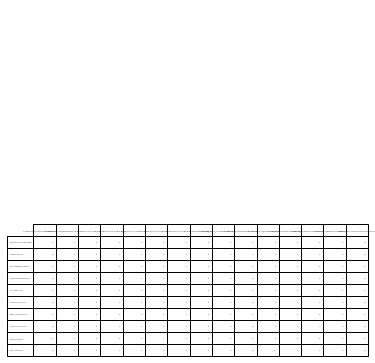

In [ ]:
from pandas.plotting import table 
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, matrix)  # where df is your data frame

plt.savefig('mytable.png')

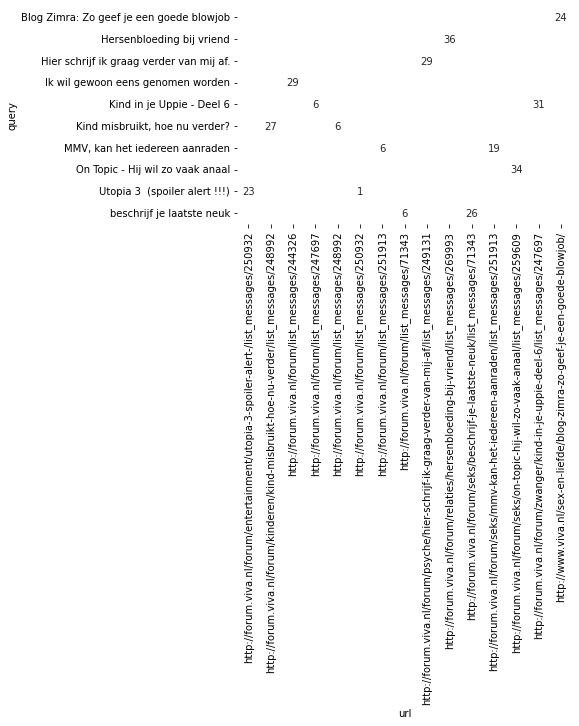

In [ ]:
import seaborn as sns
import matplotlib
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "white"],
        [norm( 1.0), "white"]]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

plot = sns.heatmap(matrix, annot=True, cmap=cmap,cbar=False)
fig = plot.get_figure()
fig.savefig('table.png', bbox_inches='tight')

In [ ]:
# test for each query
is_query = qUTopQueries['query'] == top_query.index[0]
url_counts = qUTopQueries[is_query]['click_web'].value_counts()


In [ ]:
lst = [[url,counts] for url, counts in zip(url_counts.index,url_counts)]
lst_df = pd.DataFrame(lst,columns=['url','counts'])
print(lst_df)

# concat a colun
lst2 = pd.Series([top_query.index[0] for i in range(lst_df.shape[0])])
lst2

lst_df.insert(0,'query',lst2)

lst_df

                                                 url  counts
0  http://forum.viva.nl/forum/zwanger/kind-in-je-...      31
1    http://forum.viva.nl/forum/list_messages/247697       6


,query,url,counts
0,Kind in je Uppie - Deel 6,http://forum.viva.nl/forum/zwanger/kind-in-je-...,31
1,Kind in je Uppie - Deel 6,http://forum.viva.nl/forum/list_messages/247697,6


In [ ]:
# store in the dictionary
dic = {}
dic[top_query.index[0]] = lst

In [ ]:
dic

{'Kind in je Uppie - Deel 6': [['http://forum.viva.nl/forum/zwanger/kind-in-je-uppie-deel-6/list_messages/247697',
   31],
  ['http://forum.viva.nl/forum/list_messages/247697', 6]]}

In [ ]:
a = np.array([[1,2],[3,4]])
b= *a
b

SyntaxError: ignored